<a href="https://colab.research.google.com/github/rposhala/Recommender-System-on-MovieLens-dataset/blob/main/Item_based_Collaborative_Recommender_System_using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
score_param = pd.read_csv("../data/movie_reco_scores.csv", sep = ',')
score_param.head(10)

,num_retraining,retraining_time_seconds,num_users,db_score_reco_user_15,db_score_reco_user_25,db_score_reco_user_35,db_score_reco_user_45,db_score_reco_movie_15,db_score_reco_movie_25,db_score_reco_movie_35,db_score_reco_movie_45,ch_score_reco_user_15,ch_score_reco_user_25,ch_score_reco_user_35,ch_score_reco_user_45,ch_score_reco_movie_15,ch_score_reco_movie_25,ch_score_reco_movie_35,ch_score_reco_movie_45
0,5,128,1031,0.49,0.47,0.48,0.49,0.50,0.46,0.47,0.50,4661223.31,8216597.87,11585096.11,14460864.73,2397366.70,4363759.47,6018190.88,7684525.94
1,4,103,1028,0.48,0.46,0.48,0.47,0.49,0.46,0.48,0.49,4799808.97,8224311.13,11597089.91,14870407.78,2398995.19,4325519.24,5948999.45,7233970.33
2,3,107,1025,0.48,0.47,0.48,0.49,0.51,0.47,0.48,0.49,4799547.16,8173292.35,11413949.36,14632536.44,2397836.74,4420995.60,5998433.92,7432989.03
3,2,120,1022,0.48,0.47,0.48,0.49,0.50,0.47,0.49,0.48,4798443.15,7923683.46,11328609.45,15287282.75,2426205.39,4408438.33,6114836.76,7596833.01
4,1,105,1017,0.48,0.46,0.48,0.48,0.49,0.47,0.48,0.49,4799630.92,8103524.14,11710949.65,14600583.88,2420551.32,4365204.24,5853676.87,7541252.13
5,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [19]:
df = score_param.drop(score_param.index[len(score_param)-1])

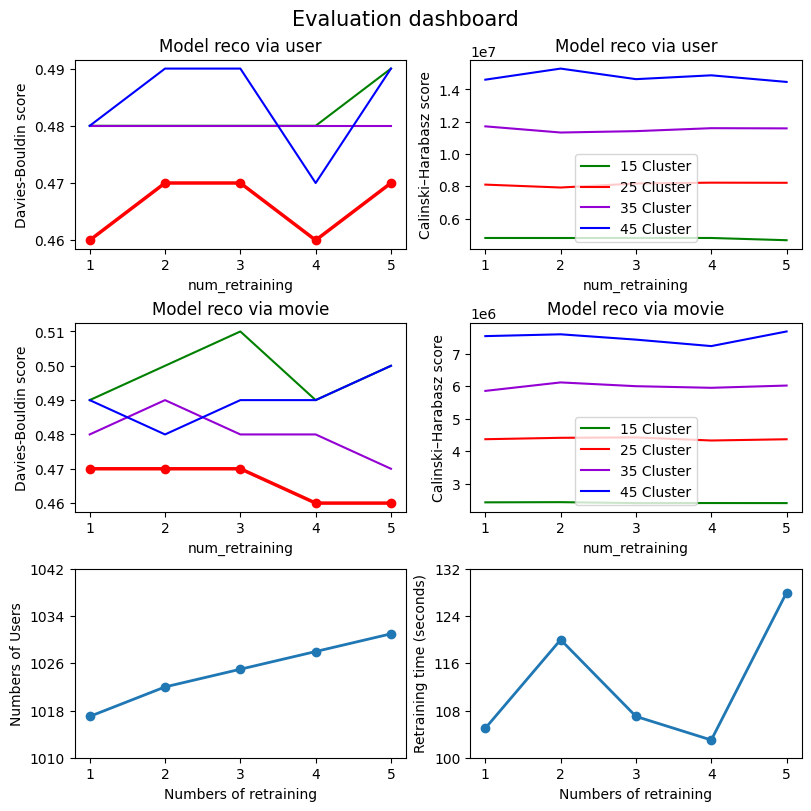

In [21]:
figure = plt.figure(figsize=(8, 8), layout='constrained')
plt.subplot(3,2,1)
# Get current axis
ax = plt.gca()
figure.suptitle('Evaluation dashboard', fontsize=15)
 
# line plot for math marks
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_user_15',
        color='green', ax=ax)

df.plot(marker = 'o',
        x='num_retraining',
        y='db_score_reco_user_25', linewidth = 2.5,
        color='red', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_user_35',
        color='darkviolet', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_user_45',
        color='blue', ax=ax)

plt.ylabel("Davies-Bouldin score", fontsize = 10)
plt.legend('',frameon=False)
ax.set_title("Model reco via user")

plt.subplot(3,2,2)
# Get current axis
ax = plt.gca()
 
# line plot for math marks
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_15',
        color='green', ax=ax)

df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_25',
        color='red', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_35',
        color='darkviolet', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_user_45',
        color='blue', ax=ax)

plt.ylabel("Calinski–Harabasz score", fontsize = 10)
plt.legend( ('15 Cluster', '25 Cluster', '35 Cluster', '45 Cluster'))
ax.set_title("Model reco via user")

#movie
plt.subplot(3,2,3)
ax = plt.gca()
# line plot for math marks
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_movie_15',
        color='green', ax=ax)

df.plot(marker = 'o',
        x='num_retraining',
        y='db_score_reco_movie_25', linewidth = 2.5,
        color='red', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_movie_35',
        color='darkviolet', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='db_score_reco_movie_45',
        color='blue', ax=ax)

plt.ylabel("Davies-Bouldin score", fontsize = 10)
plt.legend('',frameon=False)
ax.set_title("Model reco via movie")

plt.subplot(3,2,4)
# Get current axis
ax = plt.gca()
 
# line plot for math marks
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_movie_15',
        color='green', ax=ax)

df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_movie_25',
        color='red', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_movie_35',
        color='darkviolet', ax=ax)
df.plot(kind='line',
        x='num_retraining',
        y='ch_score_reco_movie_45',
        color='blue', ax=ax)

plt.ylabel("Calinski–Harabasz score", fontsize = 10)
plt.legend( ('15 Cluster', '25 Cluster', '35 Cluster', '45 Cluster'))
ax.set_title("Model reco via movie")


plt.subplot(3,2,5)
c=plt.plot(df['num_retraining'], df['num_users'], '-o', linewidth = 2)
x=np.arange(1010,1050,8)
plt.yticks(x)
plt.xlabel("Numbers of retraining", fontsize = 10)
plt.ylabel("Numbers of Users", fontsize = 10)

plt.subplot(3,2,6)
c=plt.plot(df['num_retraining'], df['retraining_time_seconds'], '-o', linewidth = 2)
x=np.arange(100,140,8)
plt.yticks(x)
plt.xlabel("Numbers of retraining", fontsize = 10)
plt.ylabel("Retraining time (seconds)", fontsize = 10)
plt.savefig('../data/Evaluation_dashboard.png')  